In [2]:
import pandas as pd
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import nbimporter
from Exploration import parse_filenames
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from tqdm import tqdm


In [3]:
data = pd.read_csv("processed_audio_features.csv")
data

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,emotion
0,-693.49700,50.064392,0.571451,14.329966,3.336370,-2.540720,-4.057909,-10.711999,-7.294139,1.740189,-4.190643,1.954662,-5.247894,5
1,-683.34680,48.889260,-1.683444,19.183002,1.969590,-0.799272,-4.795028,-12.342567,-5.447438,2.112868,-4.214960,1.387855,-5.127993,5
2,-677.80810,51.402702,-0.009546,14.301585,0.767162,-0.238382,-6.169593,-10.741851,-7.621189,1.282321,-3.815087,1.957352,-5.738728,5
3,-674.01917,50.680557,1.878226,14.295362,3.069178,1.584900,-7.450740,-11.413989,-7.078836,1.719448,-2.579532,0.674678,-4.834568,5
4,-709.05680,55.734306,2.668310,16.362572,3.344781,-1.124848,-5.818393,-8.999178,-9.009146,1.838563,-4.596883,0.866339,-5.265192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-572.82135,17.479733,-16.787226,-5.525784,-17.994290,-11.475165,-22.521809,-8.280940,-8.872310,-8.228996,-5.283133,-4.580035,3.739730,7
1436,-519.95910,31.291502,-17.592130,-7.997277,-20.116722,-11.398415,-14.523552,-10.664173,-5.106737,-8.393238,3.926535,-1.677562,1.154700,7
1437,-532.11190,23.286386,-19.971384,-4.182311,-22.439173,-15.166684,-15.472810,-9.640954,-2.224017,-5.433292,3.642620,-3.688638,0.123307,7
1438,-487.08260,20.856544,-5.492540,-1.587745,-12.486228,-5.064966,-15.309679,-1.080815,-5.219388,-4.748977,-4.673484,-5.288421,1.656228,7


In [4]:
X = data.iloc[:, :-1]  
Y = data['emotion']

le = LabelEncoder()
Y = le.fit_transform(Y)


### Split into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 ,  stratify=Y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (1152, 13)
Testing Set Shape: (288, 13)


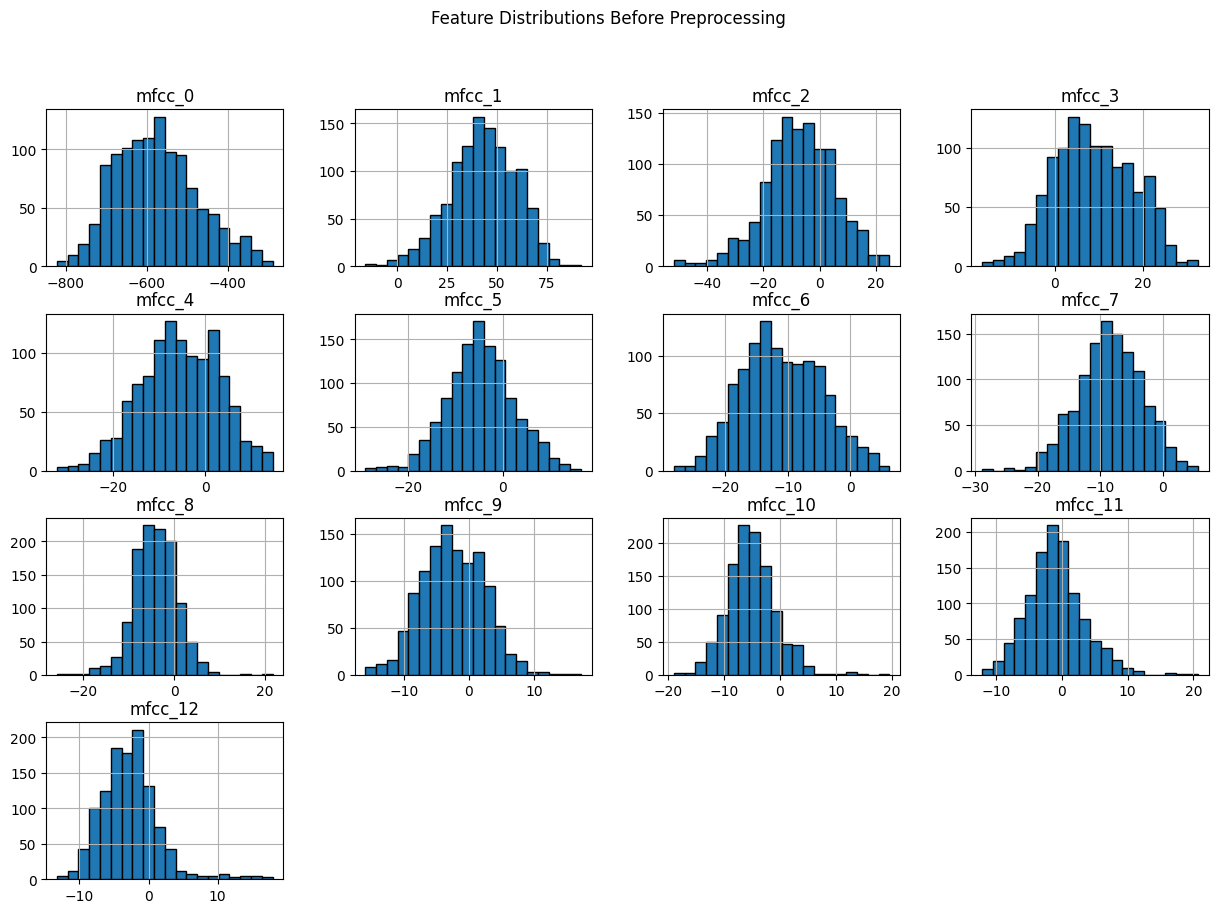

In [6]:
X_train.hist(bins=20, figsize=(15, 10),edgecolor='black')
plt.suptitle('Feature Distributions Before Preprocessing')
plt.show()

In [7]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

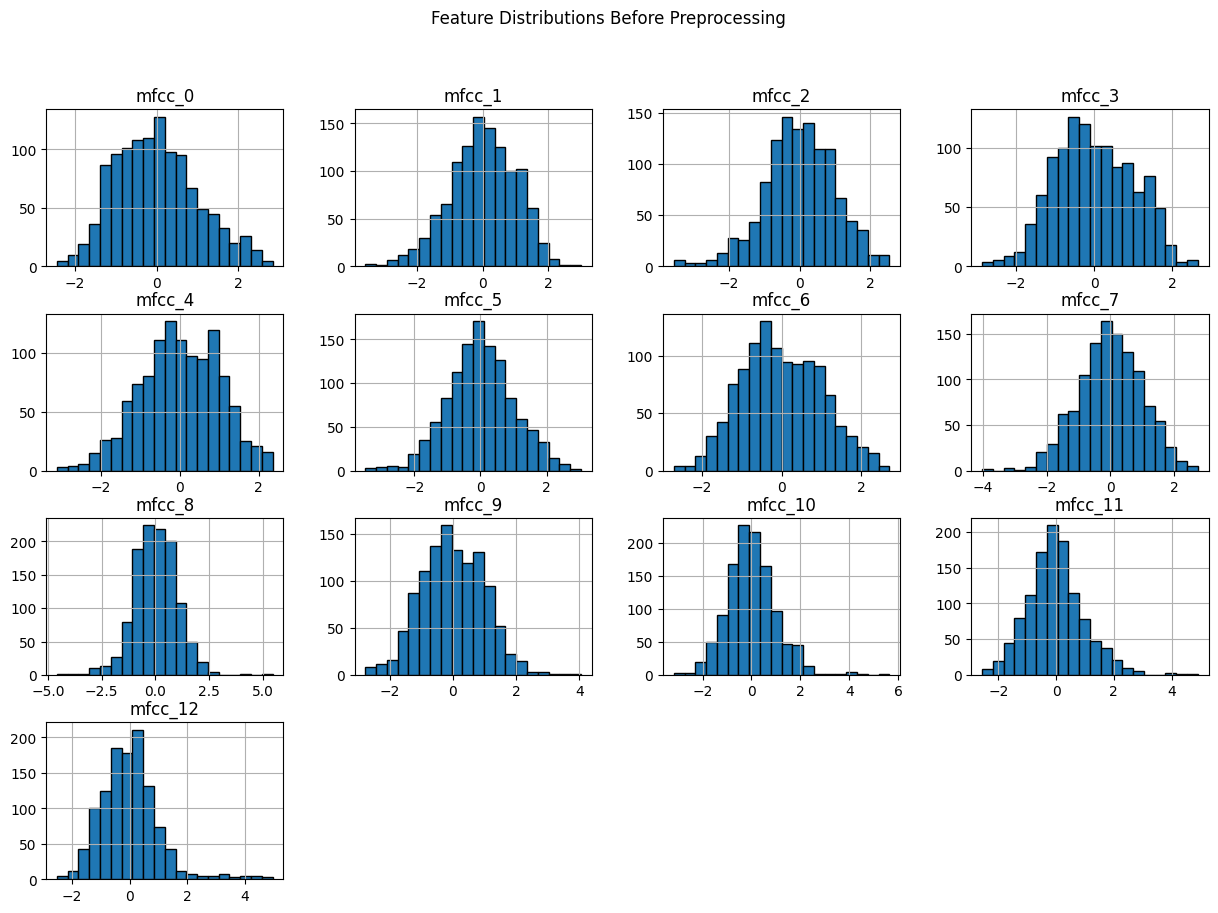

In [8]:
X_train_scaled.hist(bins=20, figsize=(15, 10),edgecolor='black')
plt.suptitle('Feature Distributions Before Preprocessing')
plt.show()

### Build Models:
---
- Train a Machine Learning Model

- Starting With Random Forest

***1) Load Processed Data***

In [9]:
data = pd.read_csv("processed_audio_features.csv")

In [10]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# rf_model.fit(X_train, y_train)

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10) # prevent overfitting

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

#### Visualizing Feature Importance
- identify which features have the most impact on predicting the emotions

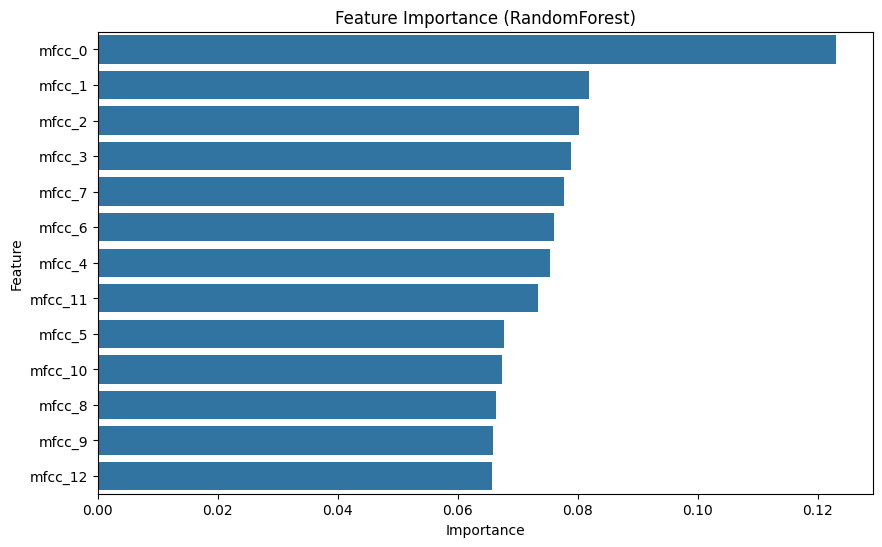

In [11]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
     'Feature': X.columns,
     'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (RandomForest)')
plt.show()

In [12]:
emotion_mapping = {
     "01": "neutral",
     "02": "calm",
     "03": "happy",
     "04": "sad",
     "05": "angry",
     "06": "fearful",
     "07": "disgust",
     "08": "surprised"
}

In [13]:
audio_dir = r"D:\FCIS_LV4\FCISLV4\Machine Learning\Project\Actors"
metadata = parse_filenames(audio_dir , emotion_mapping)

In [14]:
labels = metadata['emotion']  
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

### Evaluate the model

In [15]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
class_names = label_encoder.classes_
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))



Accuracy: 57.29%

Classification Report:
               precision    recall  f1-score   support

       angry       0.70      0.74      0.72        38
        calm       0.59      0.87      0.70        38
     disgust       0.43      0.53      0.47        38
     fearful       0.64      0.54      0.58        39
       happy       0.67      0.56      0.61        39
     neutral       0.50      0.26      0.34        19
         sad       0.55      0.45      0.49        38
   surprised       0.50      0.49      0.49        39

    accuracy                           0.57       288
   macro avg       0.57      0.55      0.55       288
weighted avg       0.58      0.57      0.57       288



#### Test Model

In [16]:
random_index = np.random.randint(0, len(X_test))
sample_test_data = X_test_scaled.iloc[random_index].to_frame().T   # (1, number_of_features)

true_label = y_test[random_index]

predicted_label = rf_model.predict(sample_test_data)

predicted_emotion = label_encoder.inverse_transform(predicted_label)
true_emotion = label_encoder.inverse_transform([true_label])

print(f"True Emotion: {true_emotion[0]}")
print(f"Predicted Emotion: {predicted_emotion[0]}")

True Emotion: happy
Predicted Emotion: happy


### Confussion Matrix

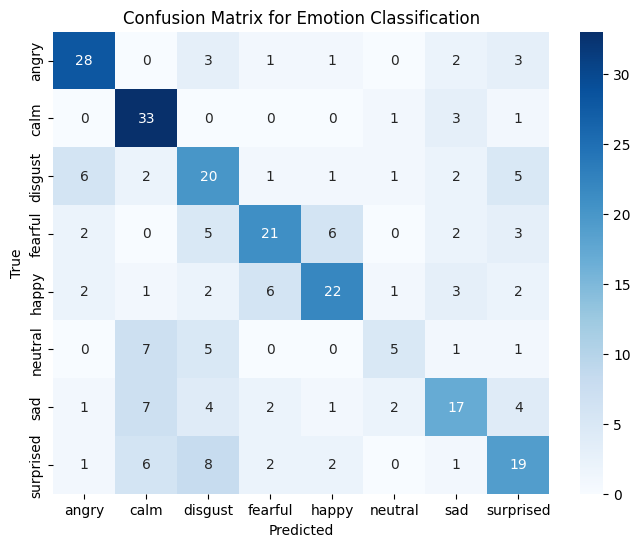

In [17]:
predicted_label2 = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, predicted_label2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Emotion Classification')
plt.show()


----

### Try Different Model

- ### XGB Classifier

In [18]:
# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate the model

In [19]:
# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 54.86%

Classification Report:
               precision    recall  f1-score   support

       angry       0.69      0.71      0.70        38
        calm       0.62      0.79      0.70        38
     disgust       0.44      0.58      0.50        38
     fearful       0.60      0.54      0.57        39
       happy       0.64      0.54      0.58        39
     neutral       0.36      0.21      0.27        19
         sad       0.46      0.45      0.45        38
   surprised       0.46      0.41      0.43        39

    accuracy                           0.55       288
   macro avg       0.53      0.53      0.53       288
weighted avg       0.55      0.55      0.54       288



### Confussion Matrix

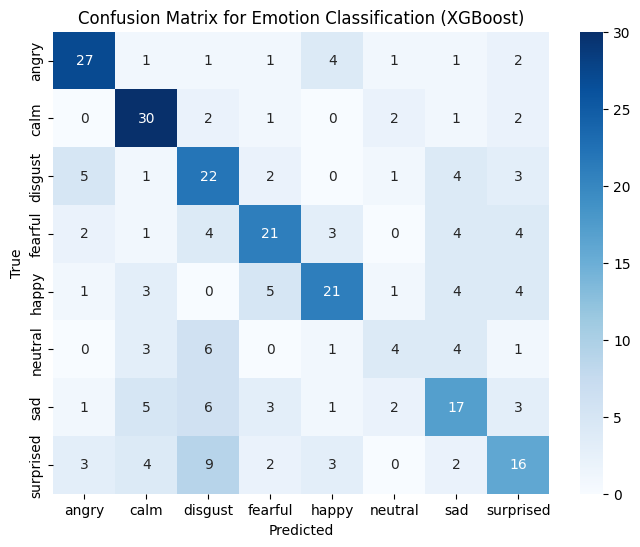

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Emotion Classification (XGBoost)')
plt.show()
